In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
from sklearn import preprocessing

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
tracks_df = pd.read_csv("Best Songs on Spotify from 2000-2023.csv", delimiter=';')

In [4]:
tracks_df.head()

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96


In [5]:
tracks_df.shape        

(2385, 14)

In [6]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2385 non-null   object
 1   artist         2385 non-null   object
 2   top genre      2385 non-null   object
 3   year           2385 non-null   int64 
 4   bpm            2385 non-null   int64 
 5   energy         2385 non-null   int64 
 6   danceability   2385 non-null   int64 
 7   dB             2385 non-null   int64 
 8   liveness       2385 non-null   int64 
 9   valence        2385 non-null   int64 
 10  duration       2385 non-null   int64 
 11  acousticness   2385 non-null   int64 
 12  speechiness    2385 non-null   int64 
 13  popularity     2385 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 261.0+ KB


In [7]:
tracks_df.describe()

,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
count,2385.00000,2385.00000,2385.00000,2385.00000,2385.00000,2385.00000,2385.00000,2385.00000,2385.00000,2385.00000,2385.00000
mean,2011.11698,119.78365,69.79245,67.03480,-5.77149,17.78700,54.23396,225.94675,15.61300,10.11237,70.52662
std,6.74836,27.27308,16.16461,13.71905,2.07215,13.62929,22.45808,43.22670,20.27775,9.52082,11.41974
min,1985.00000,60.00000,6.00000,18.00000,-18.00000,2.00000,4.00000,115.00000,0.00000,2.00000,5.00000
25%,2005.00000,98.00000,59.00000,59.00000,-7.00000,9.00000,37.00000,200.00000,2.00000,4.00000,64.00000
50%,2011.00000,120.00000,71.00000,68.00000,-5.00000,12.00000,54.00000,221.00000,7.00000,6.00000,72.00000
75%,2017.00000,134.00000,82.00000,77.00000,-4.00000,23.00000,73.00000,246.00000,22.00000,12.00000,79.00000
max,2023.00000,211.00000,100.00000,98.00000,0.00000,84.00000,97.00000,688.00000,98.00000,58.00000,98.00000


In [8]:
tracks_df.isnull().sum()

title            0
artist           0
top genre        0
year             0
bpm              0
energy           0
danceability     0
dB               0
liveness         0
valence          0
duration         0
acousticness     0
speechiness      0
popularity       0
dtype: int64

In [9]:
tracks_df.nunique()

title            2261
artist           1014
top genre         266
year               29
bpm               136
energy             87
danceability       79
dB                 19
liveness           79
valence            94
duration          235
acousticness       96
speechiness        52
popularity         81
dtype: int64

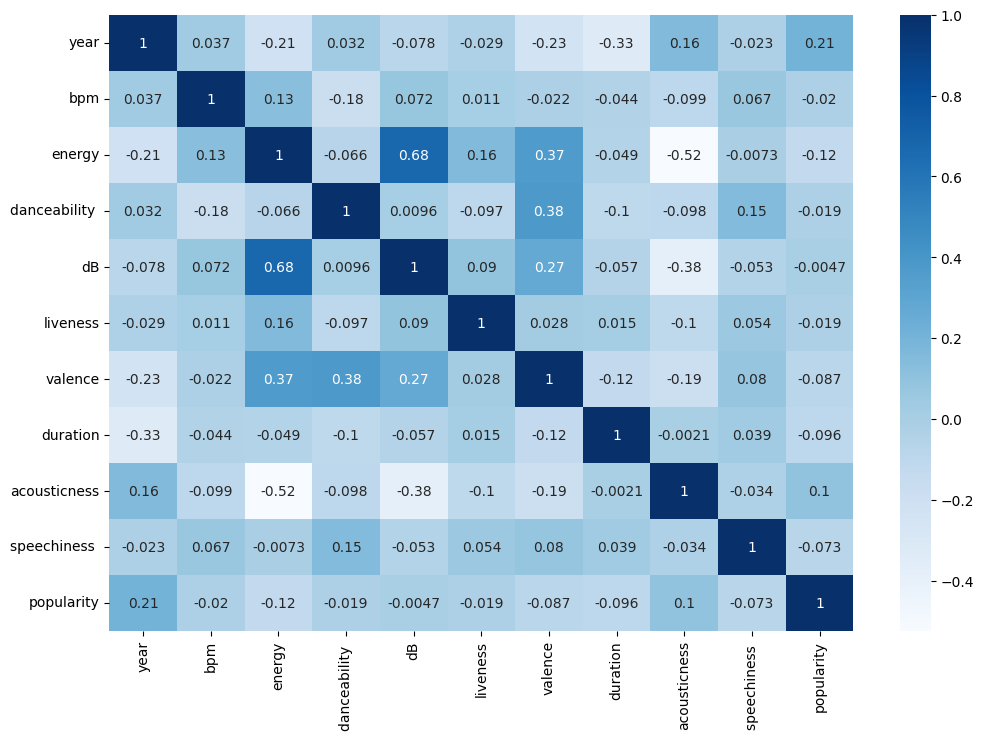

In [10]:

corr = tracks_df.loc[:,"year":"popularity"].corr()
plt.figure(figsize = (12,8))
sn.heatmap(corr, cmap="Blues", annot=True)
plt.show()

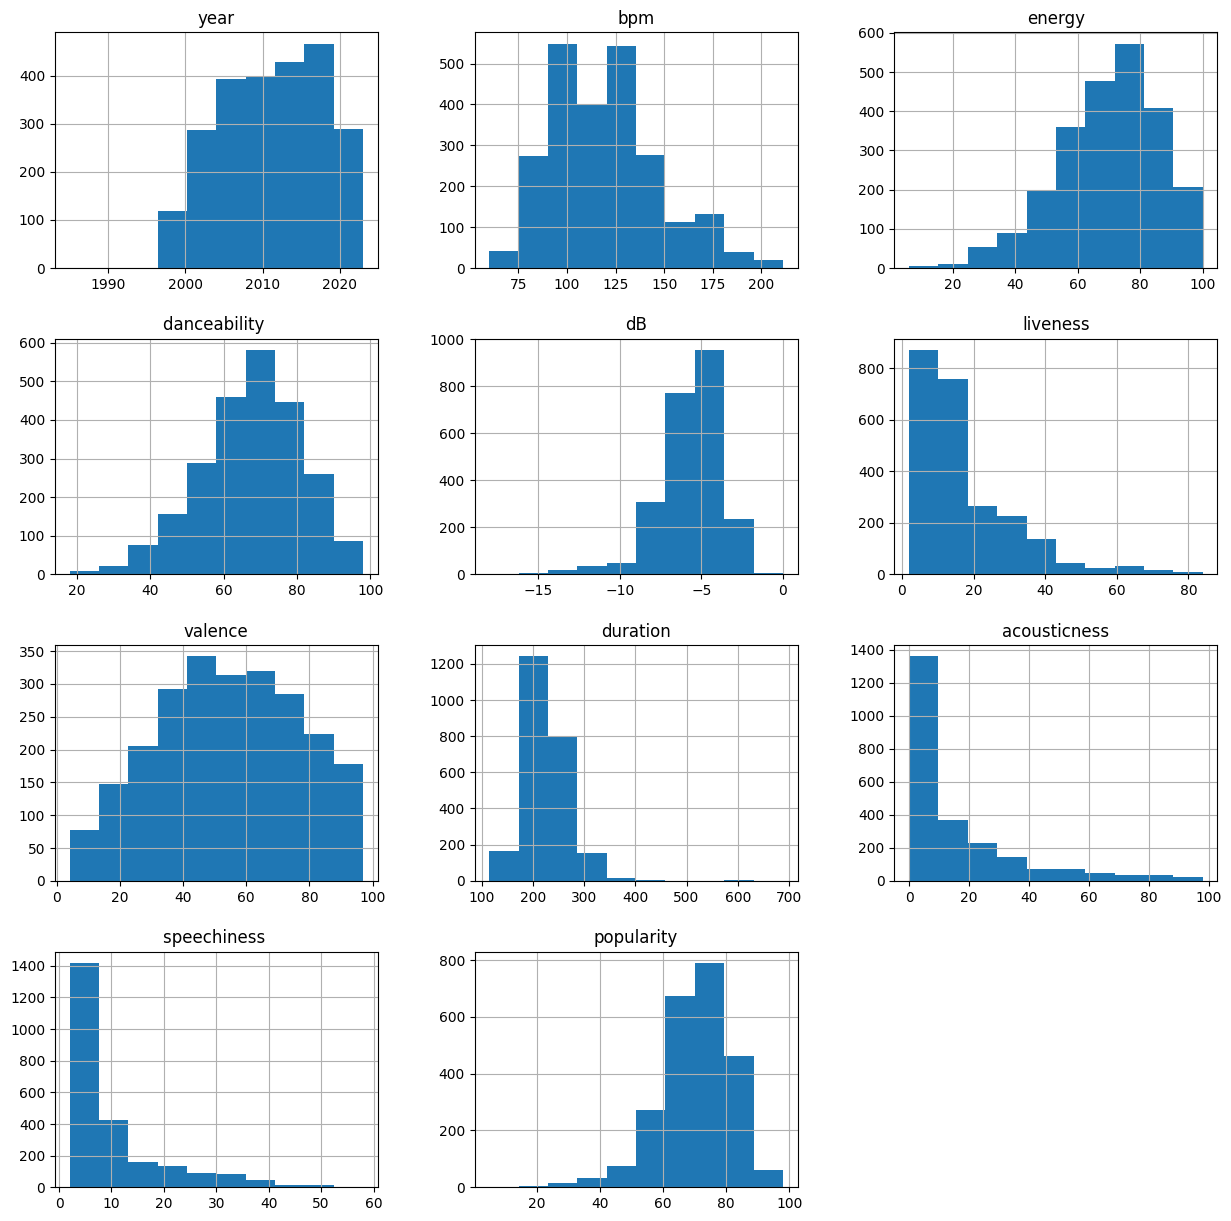

In [11]:
tracks_df.loc[:,"year":"popularity"].hist(figsize=(15,15));

In [12]:
min_max_scaler=preprocessing.MinMaxScaler()
col = tracks_df.loc[:,"year":].columns
normalized_data =min_max_scaler.fit_transform(tracks_df.loc[:,"year":])
normalized_tracks_df = pd.DataFrame(normalized_data, columns=col)

In [13]:
normalized_tracks_df.head()

,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,1.00000,0.38411,0.65957,0.66250,0.77778,0.01220,0.65591,0.14834,0.06122,0.08929,1.00000
1,1.00000,0.39735,0.56383,0.75000,0.55556,0.40244,0.74194,0.10297,0.44898,0.01786,0.98925
2,1.00000,0.23179,0.61702,0.73750,0.61111,0.18293,0.52688,0.13962,0.75510,0.21429,0.97849
3,1.00000,0.48344,0.79787,0.65000,0.55556,0.28049,0.88172,0.02792,0.25510,0.05357,0.97849
4,0.97368,0.25166,0.59574,0.67500,0.66667,0.07317,0.13978,0.18674,0.42857,0.05357,0.97849


In [14]:
for_graph = normalized_tracks_df.loc[:,"bpm":"popularity"].copy()
for_graph.loc[:,"year"] = tracks_df.loc[:,"year"]
cols = for_graph.columns.to_list()
cols = cols[-1:] + cols[:-1]
for_graph = for_graph.reindex(cols, axis=1)
for_graph.head(20)

,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,2023,0.38411,0.65957,0.66250,0.77778,0.01220,0.65591,0.14834,0.06122,0.08929,1.00000
1,2023,0.39735,0.56383,0.75000,0.55556,0.40244,0.74194,0.10297,0.44898,0.01786,0.98925
2,2023,0.23179,0.61702,0.73750,0.61111,0.18293,0.52688,0.13962,0.75510,0.21429,0.97849
3,2023,0.48344,0.79787,0.65000,0.55556,0.28049,0.88172,0.02792,0.25510,0.05357,0.97849
4,2022,0.25166,0.59574,0.67500,0.66667,0.07317,0.13978,0.18674,0.42857,0.05357,0.97849
5,2023,0.46358,0.39362,0.41250,0.50000,0.08537,0.30108,0.17103,0.84694,0.01786,0.97849
6,2023,0.79470,0.60638,0.67500,0.77778,0.08537,0.61290,0.14660,0.68367,0.46429,0.97849
7,2022,0.31126,0.79787,0.77500,0.72222,0.10976,0.81720,0.21640,0.38776,0.03571,0.96774
8,2022,0.24503,0.61702,0.57500,0.61111,0.14634,0.52688,0.15009,0.13265,0.05357,0.95699
9,2022,0.47682,0.43617,0.48750,0.55556,0.13415,0.26882,0.22164,0.54082,0.01786,0.95699


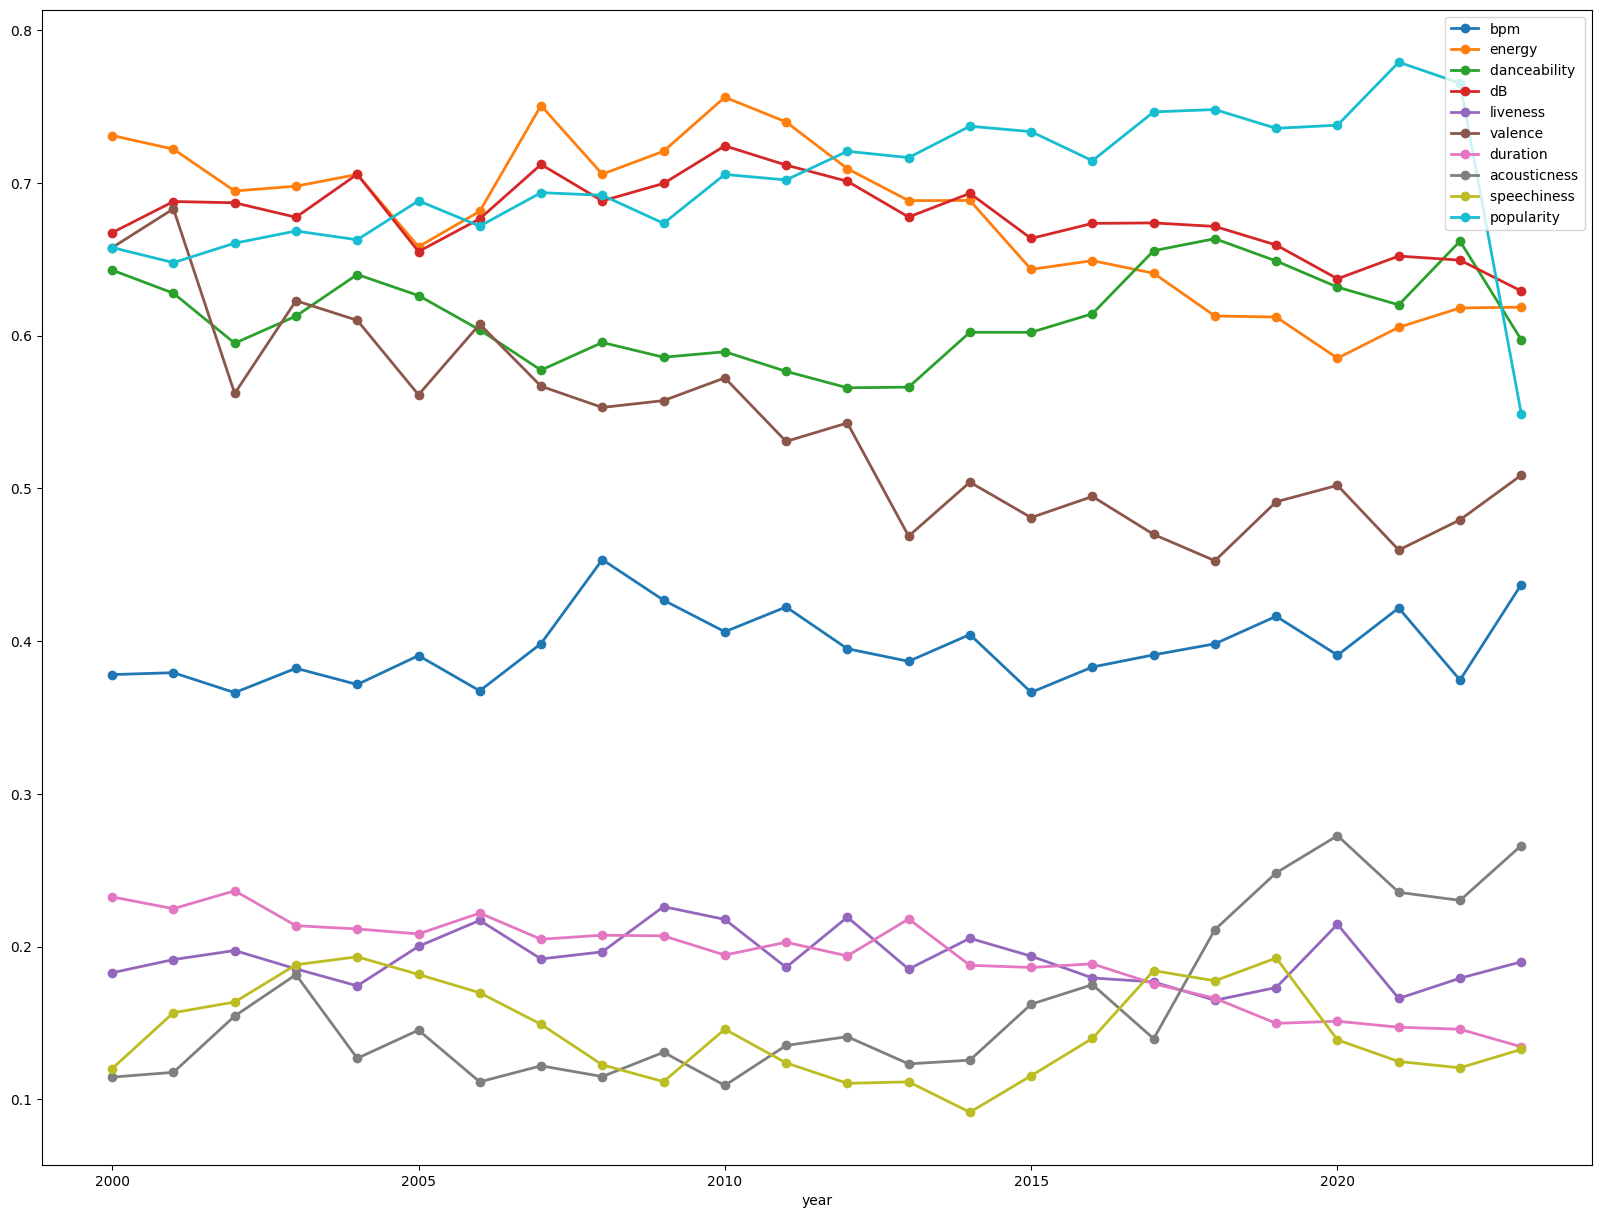

In [15]:
for_graph[for_graph['year']>=2000].groupby('year').mean().plot(legend=True, figsize = (20,15),linewidth=2, style='-o')
plt.show()

In [16]:
normalized_tracks_df.popularity.unique()

array([1.        , 0.98924731, 0.97849462, 0.96774194, 0.95698925,
       0.94623656, 0.93548387, 0.92473118, 0.91397849, 0.90322581,
       0.89247312, 0.88172043, 0.87096774, 0.86021505, 0.84946237,
       0.72043011, 0.83870968, 0.82795699, 0.8172043 , 0.80645161,
       0.70967742, 0.79569892, 0.78494624, 0.64516129, 0.77419355,
       0.76344086, 0.75268817, 0.74193548, 0.7311828 , 0.69892473,
       0.68817204, 0.67741935, 0.66666667, 0.65591398, 0.6344086 ,
       0.62365591, 0.61290323, 0.60215054, 0.59139785, 0.58064516,
       0.56989247, 0.55913978, 0.5483871 , 0.53763441, 0.52688172,
       0.51612903, 0.50537634, 0.49462366, 0.48387097, 0.47311828,
       0.46236559, 0.4516129 , 0.44086022, 0.43010753, 0.41935484,
       0.40860215, 0.39784946, 0.38709677, 0.37634409, 0.3655914 ,
       0.35483871, 0.34408602, 0.33333333, 0.32258065, 0.31182796,
       0.30107527, 0.29032258, 0.27956989, 0.25806452, 0.24731183,
       0.23655914, 0.22580645, 0.21505376, 0.20430108, 0.19354

In [17]:
popularity_threshold=0.5
normalized_tracks_df= normalized_tracks_df[normalized_tracks_df['popularity']>popularity_threshold]

In [18]:
normalized_tracks_df.shape

(2255, 11)

In [19]:
normalized_tracks_df_withIndex= normalized_tracks_df.copy()
normalized_tracks_df_withIndex.insert(0, "title",tracks_df['title'])
normalized_tracks_df_withIndex.insert(1, "artist",tracks_df['artist'])
normalized_tracks_df_withIndex = normalized_tracks_df_withIndex.drop_duplicates(subset=['title', 'artist'],keep='last')
normalized_tracks_df_withIndex.shape

(2206, 13)

In [20]:
normalized_tracks_df_withIndex= normalized_tracks_df_withIndex.set_index(['title', 'artist'])
normalized_tracks_df_withIndex.head()

,,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
title,artist,,,,,,,,,,,
Flowers,Miley Cyrus,1.00000,0.38411,0.65957,0.66250,0.77778,0.01220,0.65591,0.14834,0.06122,0.08929,1.00000
Cupid - Twin Ver.,FIFTY FIFTY,1.00000,0.39735,0.56383,0.75000,0.55556,0.40244,0.74194,0.10297,0.44898,0.01786,0.98925
BESO,ROSALÍA,1.00000,0.23179,0.61702,0.73750,0.61111,0.18293,0.52688,0.13962,0.75510,0.21429,0.97849
Boy's a liar Pt. 2,PinkPantheress,1.00000,0.48344,0.79787,0.65000,0.55556,0.28049,0.88172,0.02792,0.25510,0.05357,0.97849
Creepin' (with The Weeknd & 21 Savage),Metro Boomin,0.97368,0.25166,0.59574,0.67500,0.66667,0.07317,0.13978,0.18674,0.42857,0.05357,0.97849


In [21]:
normalized_tracks_df_withIndex = normalized_tracks_df_withIndex.reset_index()

In [22]:
normalized_tracks_df_withIndex['artist']=normalized_tracks_df_withIndex['artist'].str.lower()
normalized_tracks_df_withIndex['title']=normalized_tracks_df_withIndex['title'].str.lower()
normalized_tracks_df_withIndex.head()


,title,artist,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,flowers,miley cyrus,1.00000,0.38411,0.65957,0.66250,0.77778,0.01220,0.65591,0.14834,0.06122,0.08929,1.00000
1,cupid - twin ver.,fifty fifty,1.00000,0.39735,0.56383,0.75000,0.55556,0.40244,0.74194,0.10297,0.44898,0.01786,0.98925
2,beso,rosalía,1.00000,0.23179,0.61702,0.73750,0.61111,0.18293,0.52688,0.13962,0.75510,0.21429,0.97849
3,boy's a liar pt. 2,pinkpantheress,1.00000,0.48344,0.79787,0.65000,0.55556,0.28049,0.88172,0.02792,0.25510,0.05357,0.97849
4,creepin' (with the weeknd & 21 savage),metro boomin,0.97368,0.25166,0.59574,0.67500,0.66667,0.07317,0.13978,0.18674,0.42857,0.05357,0.97849


In [23]:
normalized_tracks_df_withIndex.describe()

,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
count,2206.00000,2206.00000,2206.00000,2206.00000,2206.00000,2206.00000,2206.00000,2206.00000,2206.00000,2206.00000,2206.00000
mean,0.68371,0.39531,0.67697,0.61289,0.67916,0.19140,0.53956,0.19373,0.16040,0.14578,0.72124
std,0.17529,0.18019,0.17247,0.17153,0.11498,0.16607,0.24082,0.07398,0.20840,0.17133,0.09724
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.50538
25%,0.52632,0.25166,0.56383,0.51250,0.61111,0.08537,0.35484,0.15009,0.02041,0.03571,0.64516
50%,0.68421,0.39735,0.69149,0.62500,0.69444,0.12195,0.53763,0.18674,0.07143,0.07143,0.72043
75%,0.84211,0.49503,0.80851,0.72500,0.77778,0.25610,0.73118,0.22688,0.22449,0.17857,0.79570
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [24]:
normalized_tracks_df_withIndex.to_csv("normalized_tracks_df_withIndex.csv")

Resource:

https://www.kaggle.com/datasets/conorvaneden/best-songs-on-spotify-for-every-year-2000-2023

https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets?select=tracks.csv

https://www.kaggle.com/code/typewind/draw-a-radar-chart-with-python-in-a-simple-way/notebook

https://everydaycodings.medium.com/anime-recommendation-system-collaborative-method-ca3e84ee41a0

https://medium.com/swlh/spotify-song-prediction-and-recommendation-system-b3bbc71398ad
